In [1]:
import sys
  
# append the path of the
# parent directory
sys.path.append("..")


import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import json, csv
import mne
import scipy
import pandas
import mbt_pyspt as mbt
from mbt_pyspt.models.eegdata import EEGData
from mbt_pyspt.modules.preprocessingflow import PreprocessingFlow
from utils.em_data_loader import generate_em_mne_events
from utils.em_data_loader import add_em_events_melo_raw
from utils.em_data_loader import parse_playlist
from utils.em_data_loader import generate_participants_events
from utils.em_data_loader import split_dataset_p1
from utils.em_data_loader import split_dataset_p2
from scipy.fft import fft, fftfreq
from pprint import pprint

print("All libraries successfully loaded!")

All libraries successfully loaded!


In [2]:
path_eo_ec = '../data/em_ca_experiment_slim/1EOEC'
path_ec_eo = '../data/em_ca_experiment_slim/2ECEO'
excluded = ['s050702', 's020702', 's060702', 's250603', 's220603', 's220604' 's170603', 's050703', 's050705']
eo_ec_folders = []
ec_eo_folders = []
eeg_folder = 'eeg_raw'
metadata_folder = 'metadata'
physio_folder = 'physio_raw'

for directory in os.listdir(path_eo_ec):
    if directory != 'excluded':
        eo_ec_folders.append(directory)
for directory in os.listdir(path_ec_eo):
    if directory != 'excluded':
        ec_eo_folders.append(directory)


generate_participants_events(path_eo_ec, eo_ec_folders, '1EOEC')
generate_participants_events(path_ec_eo, ec_eo_folders, '2ECEO')

print("All datasets loaded")
        
    


s010701 ...loaded!
Successfully saved events into  ../data/em_ca_experiment_slim/1EOEC/s010701/eeg_raw/p1\2021-07-01_10-04-55.754-Acquisier-melo_1010400041.json
Successfully saved events into  ../data/em_ca_experiment_slim/1EOEC/s010701/eeg_raw/p2\2021-07-01_10-24-49.069-Acquisier-melo_1010400041.json
s010701 ...generated events!
s010704 ...loaded!
Successfully saved events into  ../data/em_ca_experiment_slim/1EOEC/s010704/eeg_raw/p1\2021-07-01_16-22-09.426-Acquisier-melo_1010400041.json
Successfully saved events into  ../data/em_ca_experiment_slim/1EOEC/s010704/eeg_raw/p2\2021-07-01_16-46-45.948-Acquisier-melo_1010400041.json
s010704 ...generated events!
s020701 ...loaded!
Successfully saved events into  ../data/em_ca_experiment_slim/1EOEC/s020701/eeg_raw/p1\2021-07-02_10-09-41.367-Acquisier-melo_1010400041.json
Successfully saved events into  ../data/em_ca_experiment_slim/1EOEC/s020701/eeg_raw/p2\2021-07-02_10-29-04.872-Acquisier-melo_1010400041.json
s020701 ...generated events!
s020

s220602 ...loaded!
Successfully saved events into  ../data/em_ca_experiment_slim/2ECEO/s220602/eeg_raw/p1\2021-06-22_11-58-57.705-Acquisier-melo_1010300034.json
Successfully saved events into  ../data/em_ca_experiment_slim/2ECEO/s220602/eeg_raw/p2\2021-06-22_12-17-12.831-Acquisier-melo_1010300034.json
s220602 ...generated events!
s230602 ...loaded!
Successfully saved events into  ../data/em_ca_experiment_slim/2ECEO/s230602/eeg_raw/p1\2021-06-23_12-00-43.405-Acquisier-melo_1010300034.json
Successfully saved events into  ../data/em_ca_experiment_slim/2ECEO/s230602/eeg_raw/p2\2021-06-23_12-20-45.345-Acquisier-melo_1010300034.json
s230602 ...generated events!
s230603 ...loaded!
Successfully saved events into  ../data/em_ca_experiment_slim/2ECEO/s230603/eeg_raw/p1\2021-06-23_14-51-33.061-Acquisier-melo_1010300034.json
Successfully saved events into  ../data/em_ca_experiment_slim/2ECEO/s230603/eeg_raw/p2\2021-06-23_15-11-31.970-Acquisier-melo_1010300034.json
s230603 ...generated events!
s250

In [6]:
print(participants_eo_ec.keys())
print(participants_ec_eo.keys())

dict_keys(['s010701', 's010704', 's020701', 's020704', 's050701', 's070701', 's170601', 's210602', 's230604', 's240601', 's240602', 's240604', 's250601', 's260602', 's280603', 's280604', 's290602', 's290604', 's300602'])
dict_keys(['s010702', 's010703', 's020703', 's050704', 's060703', 's070702', 's220602', 's230602', 's230603', 's250602', 's250604', 's260601', 's280601', 's290601', 's290603', 's290605', 's300604'])


In [8]:

# Opening JSON file
file_part_one = open("../data/em_ca_experiment_slim/1EOEC/s020701/eeg_raw/p1/2021-07-02_10-09-41.367-Acquisier-melo_1010400041.json")
file_part_two = open("../data/em_ca_experiment_slim/1EOEC/s020701/eeg_raw/p2/2021-07-02_10-29-04.872-Acquisier-melo_1010400041.json")
file_metadata = open("../data/em_ca_experiment_slim/1EOEC/s020701/metadata/s020701_experiment_eo_ec_2021_Jul_02_0950.json")
bvp = np.genfromtxt('../data/em_ca_experiment_slim/1EOEC/s020701/physio_raw/BVP.csv')
eda = np.genfromtxt('../data/em_ca_experiment_slim/1EOEC/s020701/physio_raw/EDA.csv')
hr = np.genfromtxt('../data/em_ca_experiment_slim/1EOEC/s020701/physio_raw/HR.csv')
temp = np.genfromtxt('../data/em_ca_experiment_slim/1EOEC/s020701/physio_raw/TEMP.csv')

condition = '1EOEC'                     
# returns JSON object as 
# a dictionary
data_p1 = json.load(file_part_one)
data_p2 = json.load(file_part_two)
metadata = json.load(file_metadata)

playlist_p1_raw = metadata['playlist_p1']['val']
playlist_p2_raw = metadata['playlist_p2']['val']
playlist_p1 = parse_playlist(playlist_p1_raw, condition)
playlist_p2 = parse_playlist(playlist_p2_raw, condition)
    
print(playlist_p1, playlist_p2)

['EO/class_3_A', 'EC/class_3_B', 'EO/class_1_A', 'EC/class_1_B', 'EO/class_4_A', 'EC/class_4_B', 'EO/class_2_A', 'EC/class_2_B'] ['EO/class_4_B', 'EC/class_4_A', 'EO/class_2_B', 'EC/class_2_A', 'EO/class_1_B', 'EC/class_1_A', 'EO/class_3_B', 'EC/class_3_A']


In [4]:
events_p1 = generate_em_mne_events("../data/em_ca_experiment_slim/1EOEC/s020701/eeg_raw/p1/2021-07-02_10-09-41.367-Acquisier-melo_1010400041.json", playlist_p1, part_one=True, part_two=False)
events_p2 = generate_em_mne_events("../data/em_ca_experiment_slim/1EOEC/s020701/eeg_raw/p2/2021-07-02_10-29-04.872-Acquisier-melo_1010400041.json", playlist_p2, part_one=False, part_two=True)

add_em_events_melo_raw("../data/em_ca_experiment_slim/1EOEC/s020701/eeg_raw/p1/2021-07-02_10-09-41.367-Acquisier-melo_1010400041.json", events_p1)
add_em_events_melo_raw("../data/em_ca_experiment_slim/1EOEC/s020701/eeg_raw/p2/2021-07-02_10-29-04.872-Acquisier-melo_1010400041.json", events_p2)



Successfully saved events into  ../data/em_ca_experiment_slim/1EOEC/s020701/eeg_raw/p1/2021-07-02_10-09-41.367-Acquisier-melo_1010400041.json
Successfully saved events into  ../data/em_ca_experiment_slim/1EOEC/s020701/eeg_raw/p2/2021-07-02_10-29-04.872-Acquisier-melo_1010400041.json


In [10]:
events = [x[0] for x in events_p1]
events_id = [x[2] for x in events_p1]
data_cut_p1 = split_dataset_p1(data_p1, metadata, events, events_id, samp_rate=250)
pprint(data_cut_p1.keys())

events = [x[0] for x in events_p2]
events_id = [x[2] for x in events_p2]
data_cut_p2 = split_dataset_p1(data_p2, metadata, events, events_id, samp_rate=250)
pprint(data_cut_p2.keys())

dict_keys(['resting_EO', 'resting_EC', 'white_noise_1a', 'EO/class_3_A', 'white_noise_1b', 'EC/class_3_B', 'white_noise_2a', 'EO/class_1_A', 'white_noise_2b', 'EC/class_1_B', 'white_noise_3a', 'EO/class_4_A', 'white_noise_3b', 'EC/class_4_B', 'white_noise_4a', 'EO/class_2_A', 'white_noise_4b', 'EC/class_2_B'])
dict_keys(['white_noise', 'EO/class_4_B', 'white_noise_1a', 'EC/class_4_A', 'white_noise_1b', 'EO/class_2_B', 'white_noise_2a', 'EC/class_2_A', 'white_noise_2b', 'EO/class_1_B', 'white_noise_3a', 'EC/class_1_A', 'white_noise_3b', 'EO/class_3_B', 'white_noise_4a', 'EC/class_3_A', 'resting_EO_4b', 'resting_EC'])


In [11]:
annotations = pandas.read_csv('../data/em_ca_experiment_slim/1EOEC/s020701/metadata/s020701_experiment_eo_ec_2021_Jul_02_0950.csv', encoding='utf-8')
pprint(annotations['mouse_2.y'])

0                                                   NaN
1                                                   NaN
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3                                                   NaN
4                                                   NaN
5                                                   NaN
6                                                   NaN
7     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
8                                                   NaN
9                                                   NaN
10                                                  NaN
11                                                  NaN
12    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
13                                                  NaN
14                                                  NaN
15                                                  NaN
16                                                  NaN
17    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [14]:

statusData = data_p2['recording']['statusData']
i = 0
t_idx = []
while i < len(statusData):
    if statusData[i] == 1.0:
        print("Second: " + str(i/250) + " - Index: " + str(i))
        t_idx.append(i)
        i += 250
    else:
        i += 1
        
#print(t_idx)

sr = 250 # Sampling Rate
# Cut the Resting State EO
enter_rest_state_eo = [[], []]
idx = t_idx[1]
enter_rest_state_eo[0] = data_p1['recording']['channelData'][0][idx : idx+(120*sr)]
enter_rest_state_eo[1] = data_p1['recording']['channelData'][1][idx : idx+(120*sr)]

# Cut the Resting State EC
enter_rest_state_ec = [[],[]]
idx = t_idx[2]
enter_rest_state_ec[0] = data_p1['recording']['channelData'][0][idx : idx+(120*sr)]
enter_rest_state_ec[1] = data_p1['recording']['channelData'][1][idx : idx+(120*sr)]

# Cut the Trial 1 white noises and stimuli
wn_t1_a = [[], []]
idx = t_idx[3]
wn_t1_a[0] = data_p1['recording']['channelData'][0][idx+(15*sr) : idx+(30*sr)] #the first trial has 15 extra seconds of WN that we do not need
wn_t1_a[1] = data_p1['recording']['channelData'][1][idx+(15*sr) : idx+(30*sr)]

t1_a = [[], []]
idx = t_idx[4]
t1_a[0] = data_p1['recording']['channelData'][0][idx : idx+(60*sr)]
t1_a[1] = data_p1['recording']['channelData'][1][idx : idx+(60*sr)]

wn_t1_b = [[], []]
idx = t_idx[5]
wn_t1_b[0] = data_p1['recording']['channelData'][0][idx : idx+(15*sr)]
wn_t1_b[1] = data_p1['recording']['channelData'][1][idx : idx+(15*sr)]

t1_b = [[], []]
idx = t_idx[6]
t1_b[0] = data_p1['recording']['channelData'][0][idx : idx+(60*sr)]
t1_b[1] = data_p1['recording']['channelData'][1][idx : idx+(60*sr)]


# Cut the Trial 2 white noises and stimuli
wn_t2_a = [[], []]
idx = t_idx[7]
wn_t2_a[0] = data_p1['recording']['channelData'][0][idx : idx+(15*sr)]
wn_t2_a[1] = data_p1['recording']['channelData'][1][idx : idx+(15*sr)]

t2_a = [[], []]
idx = t_idx[8]
t2_a[0] = data_p1['recording']['channelData'][0][idx : idx+(60*sr)]
t2_a[1] = data_p1['recording']['channelData'][1][idx : idx+(60*sr)]

wn_t2_b = [[], []]
idx = t_idx[9]
wn_t2_b[0] = data_p1['recording']['channelData'][0][idx : idx+(15*sr)]
wn_t2_b[1] = data_p1['recording']['channelData'][1][idx : idx+(15*sr)]

t2_b = [[], []]
idx = t_idx[10]
t2_b[0] = data_p1['recording']['channelData'][0][idx : idx+(60*sr)]
t2_b[1] = data_p1['recording']['channelData'][1][idx : idx+(60*sr)]


# Cut the Trial 3 white noises and stimuli
wn_t3_a = [[], []]
idx = t_idx[11]
wn_t3_a[0] = data_p1['recording']['channelData'][0][idx : idx+(15*sr)]
wn_t3_a[1] = data_p1['recording']['channelData'][1][idx : idx+(15*sr)]

t3_a = [[], []]
idx = t_idx[12]
t3_a[0] = data_p1['recording']['channelData'][0][idx : idx+(60*sr)]
t3_a[1] = data_p1['recording']['channelData'][1][idx : idx+(60*sr)]

wn_t3_b = [[], []]
idx = t_idx[13]
wn_t3_b[0] = data_p1['recording']['channelData'][0][idx : idx+(15*sr)]
wn_t3_b[1] = data_p1['recording']['channelData'][1][idx : idx+(15*sr)]

t3_b = [[], []]
idx = t_idx[14]
t3_b[0] = data_p1['recording']['channelData'][0][idx : idx+(60*sr)]
t3_b[1] = data_p1['recording']['channelData'][1][idx : idx+(60*sr)]



# Cut the Trial 4 white noises and stimuli
wn_t4_a = [[], []]
idx = t_idx[15]
wn_t4_a[0] = data_p1['recording']['channelData'][0][idx : idx+(15*sr)]
wn_t4_a[1] = data_p1['recording']['channelData'][1][idx : idx+(15*sr)]

t4_a = [[], []]
idx = t_idx[16]
t4_a[0] = data_p1['recording']['channelData'][0][idx : idx+(60*sr)]
t4_a[1] = data_p1['recording']['channelData'][1][idx : idx+(60*sr)]

wn_t4_b = [[], []]
idx = t_idx[17]
wn_t4_b[0] = data_p1['recording']['channelData'][0][idx : idx+(15*sr)]
wn_t4_b[1] = data_p1['recording']['channelData'][1][idx : idx+(15*sr)]

t4_b = [[], []]
idx = t_idx[18]
t4_b[0] = data_p1['recording']['channelData'][0][idx : idx+(60*sr)]
t4_b[1] = data_p1['recording']['channelData'][1][idx : idx+(60*sr)]
#print(len(wn_t1_b[0]))



#add_events_to_meloRawJSON("../data/em_ca_experiment_slim/1EOEC/s010701/eeg_raw/test.json")

Second: 3.8 - Index: 950
Second: 23.8 - Index: 5950
Second: 104.4 - Index: 26100
Second: 119.36 - Index: 29840
Second: 199.6 - Index: 49900
Second: 214.6 - Index: 53650
Second: 295.08 - Index: 73770
Second: 310.08 - Index: 77520
Second: 390.32 - Index: 97580
Second: 405.04 - Index: 101260
Second: 485.52 - Index: 121380
Second: 500.48 - Index: 125120
Second: 580.68 - Index: 145170
Second: 595.32 - Index: 148830
Second: 675.88 - Index: 168970
Second: 690.92 - Index: 172730
Second: 771.12 - Index: 192780
Second: 811.96 - Index: 202990
Second: 947.16 - Index: 236790
Datasets loaded


266250
266250
1065


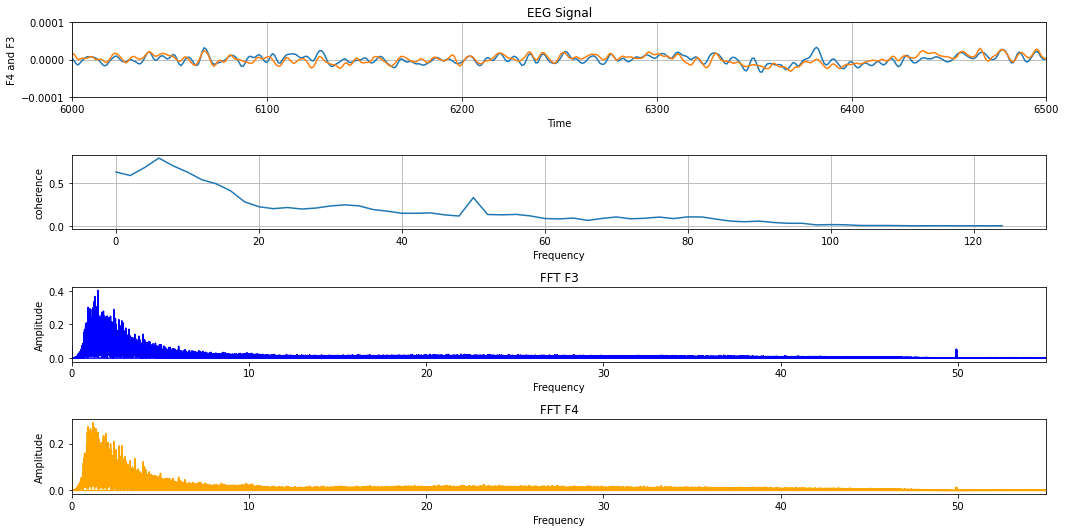

In [14]:
# Playing with Melomind data


with open("../data/em_ca_experiment_slim/1EOEC/s010701/eeg_raw/2021-07-01_10-24-49.069-Acquisier-melo_1010400041.json", 'r') as json_data:
    dataset = json.load(json_data)
    print(len(dataset['recording']['channelData'][0])) # 250 samples per second
    print(len(dataset['recording']['statusData'])) # 250 samples per second
    print(len(dataset['recording']['qualities'][0])) # 1 sample per second
    
    triggers = dataset['recording']['statusData']
    
    dt = 0.004 # sampling interval
    Fs = 1/dt # sampling frequency of 250Hz
    duration = len(dataset['recording']['qualities'][0])
    t = np.arange(0, duration * 250)
    F4 = np.array(dataset['recording']['channelData'][0])
    F3 = np.array(dataset['recording']['channelData'][1]) 
    
    plt.rcParams["figure.figsize"] = [15, 7.50]
    fig, axs = plt.subplots(4, 1)
    axs[0].set_title("EEG Signal")
    axs[0].plot(t, F4, t, F3)
    axs[0].set_xlim(6000, 6500)
    axs[0].set_ylim(-0.0001, 0.0001)
    axs[0].set_xlabel("Time")
    axs[0].set_ylabel("F4 and F3")
    axs[0].grid(True)
    
    cxy, f = axs[1].cohere(F4, F3, 125, Fs)
    axs[1].set_ylabel('coherence')
    
    N = int(250  * duration)

    yfF4 = fft(F4)
    yfF3 = fft(F3)
    xf = fftfreq(N, 1/250)

    axs[2].plot(xf, np.abs(yfF3), color='blue')
    axs[2].set_xlim(0, 55)
    axs[2].set_ylabel('Amplitude')
    axs[2].set_xlabel('Frequency')
    axs[2].set_title('FFT F3')
    
    axs[3].plot(xf, np.abs(yfF4), color='orange' )
    axs[3].set_xlim(0, 55)
    axs[3].set_ylabel('Amplitude')
    axs[3].set_xlabel('Frequency')
    axs[3].set_title('FFT F4')
    
    fig.tight_layout()
    plt.show()

In [3]:
# Using MNE data format

with open("../data/em_ca_experiment_slim/1EOEC/s010701/eeg_raw/p1/2021-07-01_10-04-55.754-Acquisier-melo_1010400041.json", 'r') as json_data:
    dataset = json.load(json_data)
    channel_data = dataset['recording']['channelData']
    sampling_rate = dataset['header']['sampRate']
    channel_locations = dataset['header']['acquisitionLocation']
    eeg_data = EEGData(channel_data, sampling_rate, channel_locations)
    print(eeg_data.mne_data.info)

Creating RawArray with float64 data, n_channels=2, n_times=269250
    Range : 0 ... 269249 =      0.000 ...  1076.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: F4, F3
 chs: 2 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 2
 projs: []
 sfreq: 250.0 Hz
>


Effective window size : 8.192 (s)


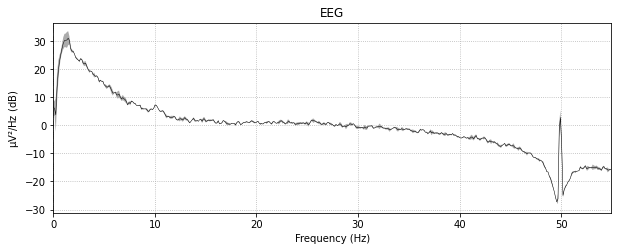

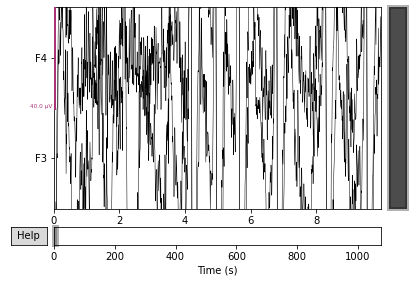

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1651 samples (6.604 sec)

Effective window size : 8.192 (s)


<ipython-input-4-186d85ae03d4>:10: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  eeg_data.mne_data.plot_psd(fmax=30, picks=frontal_channels, average=False)


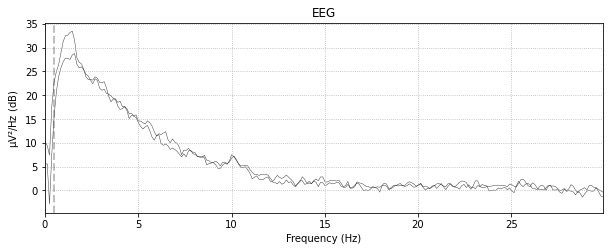

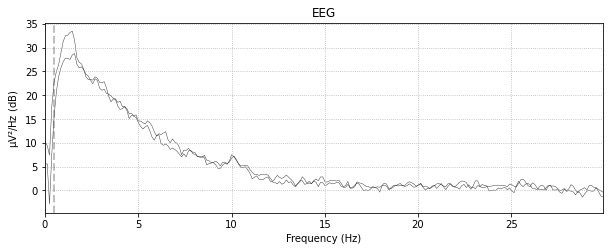

In [4]:
# Plotting with MNE data format

eeg_data.mne_data.plot_psd(fmax=55, average=True)
eeg_data.mne_data.plot(n_channels=2)
frontal_channels = channel_locations
freqs = (50, 100)
eeg_data.mne_data.notch_filter(freqs=freqs)
#eeg_data.mne_data.resample(sfreq=64)
eeg_data.mne_data.filter(l_freq=0.5, h_freq=30)
eeg_data.mne_data.plot_psd(fmax=30, picks=frontal_channels, average=False)

In [ ]:
eeg_data.mne_data.plot_psd_topo()

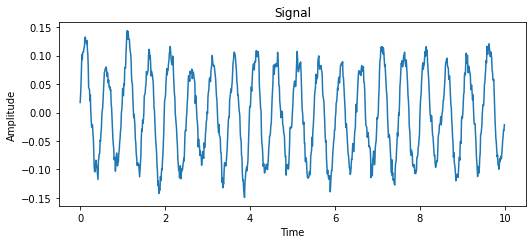

In [31]:
# Just a random signal plotting example

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

np.random.seed(0)

dt = 0.01 # sampling interval
Fs = 1 / dt # sampling frequency
t = np.arange(0, 10, dt)

# generate noise:
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]
s = 0.1 * np.sin(4 * np.pi * t) + cnse
fig, axs = plt.subplots()
axs.set_title("Signal")
axs.plot(t, s, color='C0')
axs.set_xlabel("Time")
axs.set_ylabel("Amplitude")

plt.show()

In [ ]:
# Plotting the coherence of two signals
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()
